# Function Learning

In [1]:
import deepxde as dde

Using backend: pytorch



In [2]:
import numpy as np

In [3]:
def func(x):
    return x * np.sin(5 * x)

In [4]:
geom = dde.geometry.Interval(-1,1)

In [5]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

In [10]:
activation = "tanh"
initializer = "Glorot uniform"

net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

In [11]:
net

FNN(
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [12]:
model = dde.Model(data, net)
model

In [13]:
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
'compile' took 0.000446 s



In [14]:
losshistory, train_state = model.train(iterations=10000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.04e-01]    [3.55e-01]    [1.30e+00]    
1000      [2.73e-04]    [2.79e-04]    [3.65e-02]    
2000      [7.97e-05]    [1.06e-04]    [2.25e-02]    
3000      [5.36e-05]    [7.98e-05]    [1.95e-02]    
4000      [3.22e-05]    [5.83e-05]    [1.67e-02]    
5000      [1.26e-05]    [3.61e-05]    [1.31e-02]    
6000      [1.10e-05]    [2.73e-05]    [1.14e-02]    
7000      [1.27e-06]    [1.84e-05]    [9.39e-03]    
8000      [8.73e-07]    [1.70e-05]    [9.03e-03]    
9000      [2.05e-06]    [1.78e-05]    [9.23e-03]    
10000     [3.51e-06]    [1.70e-05]    [9.03e-03]    

Best model at step 8000:
  train loss: 8.73e-07
  test loss: 1.70e-05
  test metric: [9.03e-03]

'train' took 25.987237 s



Saving loss history to /home/xteca/Documents/Project/SYTEARK/ML2022/project/tgkim/PGDA/loss.dat ...
Saving training data to /home/xteca/Documents/Project/SYTEARK/ML2022/project/tgkim/PGDA/train.dat ...
Saving test data to /home/xteca/Documents/Project/SYTEARK/ML2022/project/tgkim/PGDA/test.dat ...


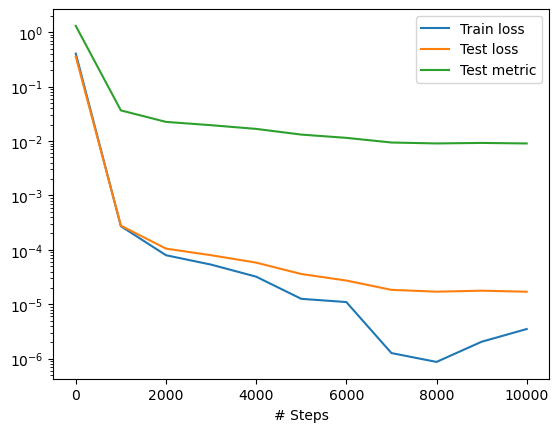

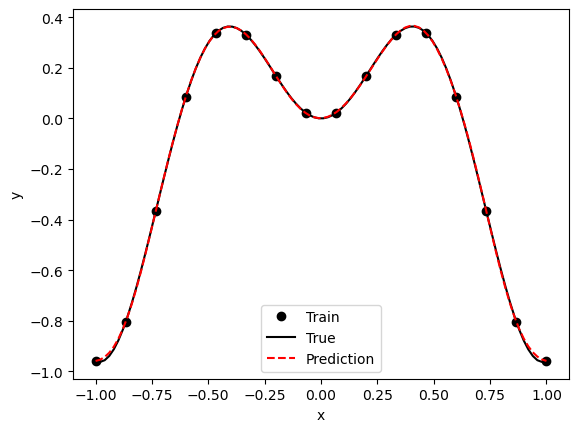

In [16]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Operator Learning

In [122]:
# Load dataset
d = np.load("antiderivative_aligned_train.npz", allow_pickle=True)
X_train = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_train = d["y"].astype(np.float32)
d = np.load("antiderivative_aligned_test.npz", allow_pickle=True)
X_test = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_test = d["y"].astype(np.float32)

In [123]:
data = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
)

In [126]:
x0 = X_test[1]
y0 = X_test[0][0,:]
z0 = y_test[0,:]

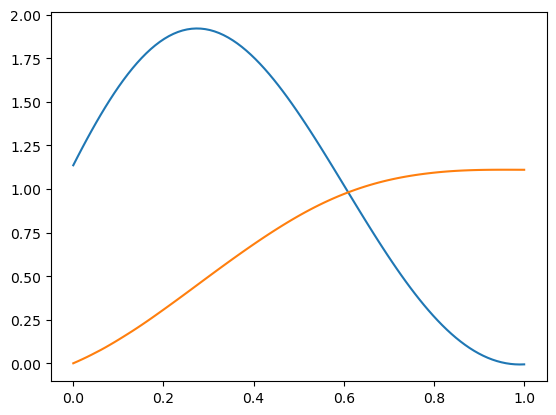

In [127]:
plt.plot(x0, y0)
plt.plot(x0, z0)

In [37]:
# Choose a network
m = 100
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

In [39]:
net

DeepONetCartesianProd(
  (branch): FNN(
    (linears): ModuleList(
      (0): Linear(in_features=100, out_features=40, bias=True)
      (1): Linear(in_features=40, out_features=40, bias=True)
    )
  )
  (trunk): FNN(
    (linears): ModuleList(
      (0): Linear(in_features=1, out_features=40, bias=True)
      (1): Linear(in_features=40, out_features=40, bias=True)
    )
  )
)

In [40]:
# Define a Model
model = dde.Model(data, net)

In [41]:
# Compile and Train
model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

Compiling model...
'compile' took 0.000410 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.51e-01]    [1.88e-01]    [8.25e-01]    
1000      [3.59e-05]    [5.71e-05]    [2.97e-02]    
2000      [1.05e-05]    [2.14e-05]    [1.91e-02]    
3000      [6.64e-06]    [1.50e-05]    [1.63e-02]    
4000      [5.46e-06]    [1.28e-05]    [1.51e-02]    
5000      [4.99e-06]    [1.19e-05]    [1.44e-02]    
6000      [3.89e-06]    [9.88e-06]    [1.33e-02]    
7000      [3.55e-06]    [9.10e-06]    [1.26e-02]    
8000      [4.62e-06]    [9.03e-06]    [1.21e-02]    
9000      [8.88e-06]    [1.50e-05]    [1.33e-02]    
10000     [4.34e-05]    [4.85e-05]    [1.80e-02]    

Best model at step 7000:
  train loss: 3.55e-06
  test loss: 9.10e-06
  test metric: [1.26e-02]

'train' took 37.233339 s



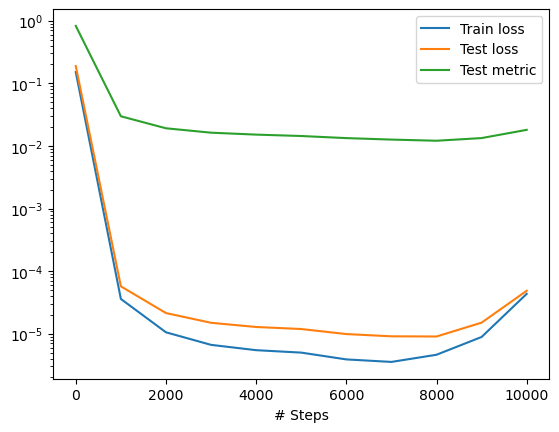

In [42]:
# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.show()

In [46]:
import torch

$$
v(x) = \sin(\pi  x) \\
u(x) = -\frac{1}{\pi}  (\cos(\pi  x) - 1)
$$

In [131]:
x = torch.linspace(0, 1, 100).reshape(100,1)
y = torch.sin(x * torch.pi).reshape(1,100)

In [132]:
net

DeepONetCartesianProd(
  (branch): FNN(
    (linears): ModuleList(
      (0): Linear(in_features=100, out_features=40, bias=True)
      (1): Linear(in_features=40, out_features=40, bias=True)
    )
  )
  (trunk): FNN(
    (linears): ModuleList(
      (0): Linear(in_features=1, out_features=40, bias=True)
      (1): Linear(in_features=40, out_features=40, bias=True)
    )
  )
)

In [133]:
z = net((y,x))

In [134]:
z.shape

torch.Size([1, 100])

In [135]:
x = x.detach().cpu().numpy().reshape((100,))
y = y.detach().cpu().numpy().reshape((100,))
z = z.detach().cpu().numpy().reshape((100,))

In [150]:
plt.rcParams['text.usetex'] = True

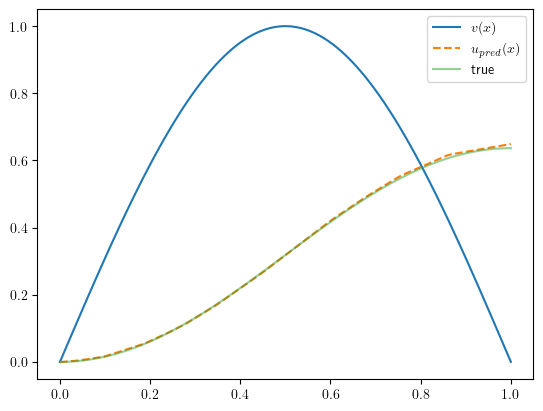

In [153]:
plt.plot(x,y, label='$v(x)$')
plt.plot(x,z, '--', label='$u_{pred}(x)$')
plt.plot(x, -(np.cos(np.pi * x) - 1) / np.pi, alpha=0.5, label='true')
plt.legend()
plt.show()